## 1. 데이터 둘러보기

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,192 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [3]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'


import warnings #경고 메세지 무시하기
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 데이터 불러오기
gm = pd.read_excel('/content/drive/MyDrive/data/2023 스터디 프로젝트 데이터/오픈마켓/오픈마켓 매체별 주문 데이터.xlsx', sheet_name = 4)

In [24]:
gm.head()

,Title,Title_URL,Image,Shop_URL,Shop,Shop_URL1,sale,sale2,Price,Price3,Tag,Tag4,buy,Shop5,Shop6,Current_Time
0,생새우살 특대 사이즈 1+1(약 40마리),"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,16.0,할인,"10,900원","13,000원",최대 2.3% 적립,무료배송,"1,007\n구매",NaN,NaN,2020-12-16 18:03:23.897
1,본사직영! 코웨이 직수정수기 첫 할인!,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,NaN,NaN,"20,900원",NaN,NaN,NaN,"1,786\n구매",NaN,NaN,2020-12-16 18:03:23.993
2,코카콜라 제로 300ml x24페트 +2021 달력,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",코카콜라 브랜드위크 12% 중복할인쿠폰받기,NaN,2.0,할인,"20,580원","21,000원",최대 2.3% 적립,무료배송,"2,019\n구매",12% 중복할인,쿠폰받기,2020-12-16 18:03:24.060
3,나크제이 디퓨저 500ml 크리스마스 에디션,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,61.0,할인,"8,900원","23,000원",최대 2.3% 적립,무료배송,1만+\n구매,NaN,NaN,2020-12-16 18:03:24.113
4,국내산 한치 250gX6팩 / 총 12마리,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/hanbando/202012/8d6...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",공영쇼핑TV 9% 중복쿠폰받기,"javascript:GoSNAChannel('CHM2J042','http://min...",NaN,NaN,"49,900원",NaN,최대 2.3% 적립,무료배송,3\n구매,9% 중복,쿠폰받기,2020-12-16 18:03:24.200


In [7]:
# 컬럼 기본 정보 확인하기
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         292 non-null    object 
 1   Title_URL     292 non-null    object 
 2   Image         292 non-null    object 
 3   Shop_URL      169 non-null    object 
 4   Shop          169 non-null    object 
 5   Shop_URL1     121 non-null    object 
 6   sale          221 non-null    float64
 7   sale2         221 non-null    object 
 8   Price         292 non-null    object 
 9   Price3        221 non-null    object 
 10  Tag           281 non-null    object 
 11  Tag4          247 non-null    object 
 12  buy           286 non-null    object 
 13  Shop5         169 non-null    object 
 14  Shop6         169 non-null    object 
 15  Current_Time  292 non-null    object 
dtypes: float64(1), object(15)
memory usage: 36.6+ KB


In [8]:
# 연속형 데이터의 통계치 확인
gm.describe()

,sale
count,221.000000
mean,32.325792
std,23.007760
min,1.000000
25%,11.000000
50%,27.000000
75%,50.000000
max,70.000000


In [ ]:
# 범주형 데이터의 통계치 확인하기
gm.describe(include = np.object_)

,Title,Title_URL,Image,Shop_URL,Shop,Shop_URL1,sale2,Price,Price3,Tag,Tag4,buy,Shop5,Shop6,Current_Time
count,292,292,292,169,169,121,221,292,221,281,247,286,169,169,292
unique,292,292,292,64,101,29,1,189,168,3,1,225,71,1,292
top,생새우살 특대 사이즈 1+1(약 40마리),"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,"javascript:GoSNAChannel('CHM2J043','http://cor...",스마일클럽은 매일 무료배송쿠폰받기,http://shop.gmarket.co.kr/SmartDelivery/SmartD...,할인,"19,900원","30,000원",최대 2.3% 적립,무료배송,1만+\n구매,매일 무료배송,쿠폰받기,2020-12-16 18:03:23.897
freq,1,1,1,31,20,79,221,10,6,201,247,22,31,169,1


In [23]:
print('Title: ', gm['Title'].unique())
print('Title_URL: ', gm['Title_URL'].unique())
print('Image: ', gm['Image'].unique())
print('Shop_URL: ', gm['Shop_URL'].unique())
print('Shop: ', gm['Shop'].unique())

Title:  ['생새우살 특대 사이즈 1+1(약 40마리)' '본사직영! 코웨이 직수정수기 첫 할인!'
 '코카콜라 제로 300ml x24페트 +2021 달력' '나크제이 디퓨저 500ml 크리스마스 에디션'
 '국내산 한치 250gX6팩 / 총 12마리' '[롯데렌터카]신차장기렌트+블랙박스/썬팅제공'
 '국내생산 3D 일회용마스크 100매 무료배송' '[총12입]모나리자 미용티슈 250매 3입 4팩'
 '[20%+20%] 쉬슬러 고농축 세탁세제 2개+증정' '팬틴 극손상케어 트리트먼트 6개+미니증정'
 '[15%] 제주 달달한 구좌 흙당근 5kg (중-특왕)' '어묵 어묵탕 어묵꼬치 20개+장국4봉'
 '[20%+7%] 바나나는원래하얗다 190ml 24팩' '라이트 스탠다드 참치 100g 15캔 원터치'
 '바다원 햇멸치 1.5kg (고바/ 조림용)' '[15%] 제주돼지 뒷고기 구이용 250g x 4팩'
 '(etv)하림 에어프라이어 순살치킨 480gX2봉' '깨끗한나라 벚꽃 프리미엄 화장지 (총90롤)'
 '통영 베네치아수산 통영 생굴 1kg' '포천이동갈비 돈왕1kg 왕갈비3대 맛집 그대로'
 '[5%쿠폰] 피스넷 프리고 블루투스 이어폰' '[15%쿠폰] 테스 국내산 컬링 가습기 TESS-09W'
 '3.6V 충전식 무선 전동 드라이버 47종 세트' '크리스마스 일주일 쥬얼리 7종세트 외'
 '[15%] 크라운 봉지 과자 골라담기+사은품' '에고이스트 사가퍼 라그랑 볼륨 구스 숏 다운'
 '[25%중복쿠폰] GGPX 패딩/무스탕 외' '밀레  한파의 시작  남여 해비다운/롱패딩 6종'
 '일렉트로룩스 에어로퍼포머 진공청소기' '테팔 스페셜에디션 프라이팬24+28cm' "Age20's 핑크다이아팩트 기획세트"
 '[20%+15%쿠폰] 일리윤 리페어 로션 3개' '프릴 산뜻한 자몽향 750ml 6개 + 증정'
 '에너자이저 패밀리팩 건전지 AA/AAA 총48입' '연세 멸균우유 비타민플러스 48팩+15%'
 '소시지 리치부어스트 1.5kg +핫도그 증정'

In [25]:
print('Shop_URL1: ', gm['Shop_URL1'].unique())
print('sale2: ', gm['sale2'].unique())
print('Price: ', gm['Price'].unique())
print('Price: ', gm['Price3'].unique())
print('Tag: ', gm['Tag'].unique())
print('Tag: ', gm['Tag4'].unique())
print('buy: ', gm['buy'].unique())
print('Shop5: ', gm['Shop5'].unique())
print('Shop6: ', gm['Shop6'].unique())

Shop_URL1:  [nan
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/gongyoungtv', '');"
 'http://shop.gmarket.co.kr/SmartDelivery/SmartDelivery.aspx'
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/nsmalltv', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/skstoa', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/lotteec', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/iparkmall', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/tefalmall', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/innisfree', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/galleria6', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/LFmallG', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.kr/leecomnepa', '');"
 "javascript:GoSNAChannel('CHM2J042','http://minishop.gmarket.co.k

In [35]:
# 데이터 내용 간단히 정리
print('총 데이터 수 : ', gm.shape[0] * gm.shape[1])
print('총 결측치 수 : {} = 전체 데이터의 {:.2f}%'.format(gm.isnull().sum().sum(), (gm.isnull().sum().sum() * 100) / (gm.shape[0] * gm.shape[1])))
print('G마켓-슈퍼딜 상품 수 : ', gm['Title'].nunique())
print('제공한 쿠폰 상세 페이지 수: ', gm['Shop_URL'].nunique())
print('쿠폰 종류 수 : ', gm['Shop'].nunique())
print('상품 카테고리 수 : ', gm['Shop_URL1'].nunique())
print('적립 가능한 포인트 종류 수 : ', gm['Tag'].nunique())
print('쿠폰 이름 중에서 굵은 글씨 부분 종류 수 : ',gm['Shop5'].nunique())

총 데이터 수 :  4672
총 결측치 수 : 938 = 전체 데이터의 20.08%
G마켓-슈퍼딜 상품 수 :  292
제공한 쿠폰 상세 페이지 수:  64
쿠폰 종류 수 :  101
상품 카테고리 수 :  29
적립 가능한 포인트 종류 수 :  3
쿠폰 이름 중에서 굵은 글씨 부분 종류 수 :  71


## 2. 데이터 정비하기

### 2-1 결측치 처리하기

In [ ]:
gm.isnull().any(axis = 0)

Title           False
Title_URL       False
Image           False
Shop_URL         True
Shop             True
Shop_URL1        True
sale             True
sale2            True
Price           False
Price3           True
Tag              True
Tag4             True
buy              True
Shop5            True
Shop6            True
Current_Time    False
dtype: bool

In [ ]:
gm.isnull().sum()

Title             0
Title_URL         0
Image             0
Shop_URL        123
Shop            123
Shop_URL1       171
sale             71
sale2            71
Price             0
Price3           71
Tag              11
Tag4             45
buy               6
Shop5           123
Shop6           123
Current_Time      0
dtype: int64

In [ ]:
gm['sale'].fillna(0, inplace = True)
gm['Shop6'].fillna('쿠폰받기x', inplace = True)
gm.head()

,Title,Title_URL,Image,Shop_URL,Shop,Shop_URL1,sale,sale2,Price,Price3,Tag,Tag4,buy,Shop5,Shop6,Current_Time
0,생새우살 특대 사이즈 1+1(약 40마리),"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,16.0,할인,"10,900원","13,000원",최대 2.3% 적립,무료배송,"1,007\n구매",NaN,쿠폰받기x,2020-12-16 18:03:23.897
1,본사직영! 코웨이 직수정수기 첫 할인!,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,0.0,NaN,"20,900원",NaN,NaN,NaN,"1,786\n구매",NaN,쿠폰받기x,2020-12-16 18:03:23.993
2,코카콜라 제로 300ml x24페트 +2021 달력,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",코카콜라 브랜드위크 12% 중복할인쿠폰받기,NaN,2.0,할인,"20,580원","21,000원",최대 2.3% 적립,무료배송,"2,019\n구매",12% 중복할인,쿠폰받기,2020-12-16 18:03:24.060
3,나크제이 디퓨저 500ml 크리스마스 에디션,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/service_image/2020/...,NaN,NaN,NaN,61.0,할인,"8,900원","23,000원",최대 2.3% 적립,무료배송,1만+\n구매,NaN,쿠폰받기x,2020-12-16 18:03:24.113
4,국내산 한치 250gX6팩 / 총 12마리,"javascript:GoSNAChannel('CHM2J040','http://ite...",http://image.gmarket.co.kr/hanbando/202012/8d6...,"javascript:GoSNAChannel('CHM2J043','http://rpp...",공영쇼핑TV 9% 중복쿠폰받기,"javascript:GoSNAChannel('CHM2J042','http://min...",0.0,NaN,"49,900원",NaN,최대 2.3% 적립,무료배송,3\n구매,9% 중복,쿠폰받기,2020-12-16 18:03:24.200


## 3. EDA & Visualization

### 3-1. ‘쿠폰받기’ 가능한  상품 비율은?

In [ ]:
gm['Shop6'].value_counts()

쿠폰받기     169
쿠폰받기x    123
Name: Shop6, dtype: int64

Text(0.5, 1.0, '쿠폰받기 가능 여부 수')

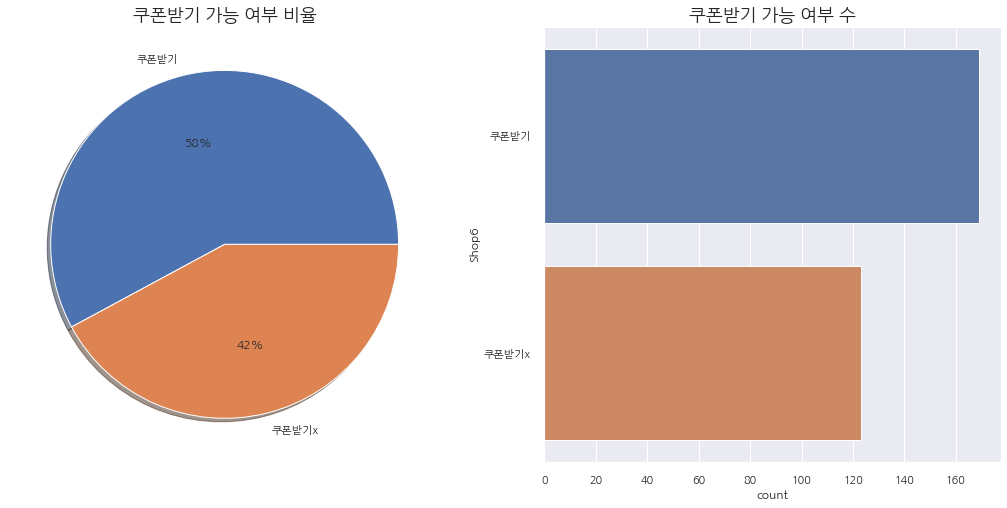

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

gm['Shop6'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True)
ax[0].set_title('쿠폰받기 가능 여부 비율', size = 18)
ax[0].set_ylabel('')

sns.countplot(data = gm, y = 'Shop6', order = ['쿠폰받기', '쿠폰받기x'], ax = ax[1])
ax[1].set_title('쿠폰받기 가능 여부 수', size = 18)

### 3-2. 쿠폰 유무에 따른 할인율 분포

In [ ]:
gm['sale'].describe()

count    292.000000
mean      24.465753
std       24.354954
min        0.000000
25%        1.000000
50%       15.000000
75%       50.000000
max       70.000000
Name: sale, dtype: float64

In [ ]:
print(gm.skew())
print(gm.kurt())

sale    0.668821
dtype: float64
sale   -1.030161
dtype: float64


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


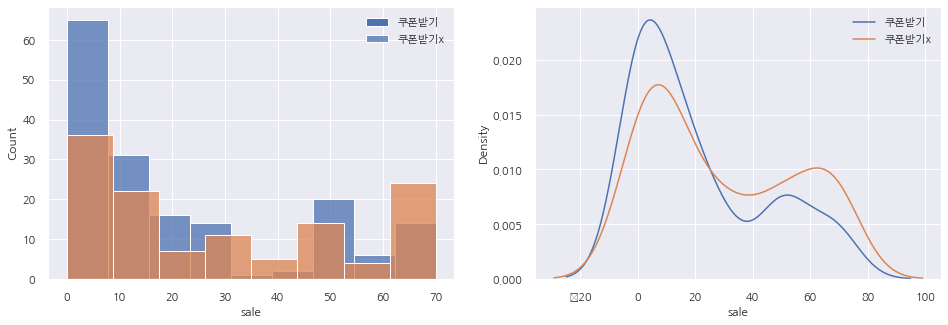

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

sns.histplot(gm[gm['Shop6'] == '쿠폰받기']['sale'], ax = ax[0])
sns.histplot(gm[gm['Shop6'] == '쿠폰받기x']['sale'], ax = ax[0])
ax[0].legend(['쿠폰받기', '쿠폰받기x'])

sns.kdeplot(gm[gm['Shop6'] == '쿠폰받기']['sale'], ax = ax[1])
sns.kdeplot(gm[gm['Shop6'] == '쿠폰받기x']['sale'], ax = ax[1])
ax[1].legend(['쿠폰받기', '쿠폰받기x'])

plt.show()

### 2-3. 가장 비싼 제품과 가장 싼 제품은?